In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal
import data

In [2]:
mu = [np.array([[0.0], [0.0], [0.0], [0.0], [0.0]])]
gauss_lambda = [np.identity(5)*0.001]
a = [1]
b = [0.01]

def phi_function(x, mu):
    return sum([mu[n]*(x**n) for n in range(5)])


def phi(x):
    return np.array([x**n for n in range(5)]).reshape(-1,1)
        

def gen_lambda_dist():
    i = len(mu)-1
    return gamma(a[i], scale=1/b[i])

def gen_w_dist(lmd):
    i = len(mu)-1
    return multivariate_normal(mu[i].flatten(), np.linalg.inv(gauss_lambda[i])/lmd)

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

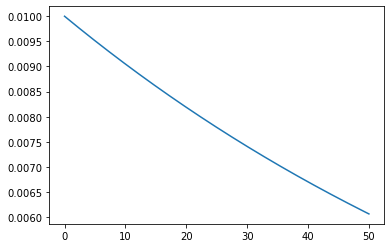

In [3]:
lambda_dist = gen_lambda_dist()
draw(lambda_dist, 0, 50, 0.01)

In [4]:
lambda_dist.rvs(10)

array([435.09112266,  79.78174964, 183.34992746, 122.00425865,
       229.61224304,  42.75244967,  22.14641796, 100.10669076,
       223.84771116, 121.00369807])

In [5]:
lmd = lambda_dist.rvs(1)
w_dist = gen_w_dist(lmd)

In [6]:
#data = []
#for i in range(1000):
#    x = (np.random.rand() - 0.5)*10
#    y = x**2 + np.random.randn() + 0.4
    
#    data.append([x,y])

data = data.x_00121 

In [7]:
def draw_data(data):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    plt.show()

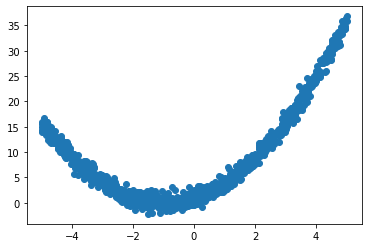

In [8]:
draw_data(data)

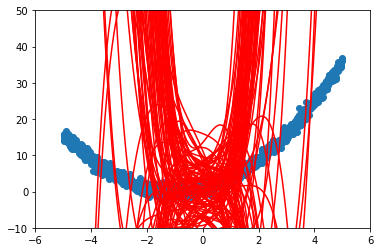

In [9]:
def draw_estimate(data, mus):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    
    xs = np.arange(-5, 5, 0.01)
    
    for mu in mus:
        ys = [phi_function(x, mu) for x in xs]
        plt.plot(xs, ys, color="red")
    
def draw_estimates(num, data):
    mus = []

    lmd_dist = gen_lambda_dist()
    lmds = lmd_dist.rvs(num)

    for mld in lmds: 
        w_dist = gen_w_dist(lmd)
        mus.append(w_dist.rvs(1))
    
    draw_estimate(data, mus)
    
    plt.xlim(-6,6)
    plt.ylim(-10,50)
    plt.show()
   
draw_estimates(10, data)

In [10]:
def update(data):
    i = len(mu)
    ph_vecs = [phi(x[0]) for x in data]
    ph_sum = sum([np.dot(p, p.T) for p in ph_vecs])
    
    gauss_lambda.append(gauss_lambda[0] + ph_sum)
    y_ph = [data[j][1]*ph_vecs[j] for j in range(len(ph_vecs))]    
    mu.append(
        np.dot(
            np.linalg.inv(gauss_lambda[i]),
            sum(y_ph) + np.dot(gauss_lambda[0], mu[0])
        )
    )
    
    a.append(a[0] + len(data)/2)
    b.append(b[0] + 0.5*(
        np.squeeze(
            np.dot( np.dot(mu[0].T, gauss_lambda[0]) , mu[0] ) 
            - np.dot( np.dot(mu[i].T, gauss_lambda[i]) , mu[i] )
            + sum([d[1]*d[1] for d in data])
        )
    ))
    

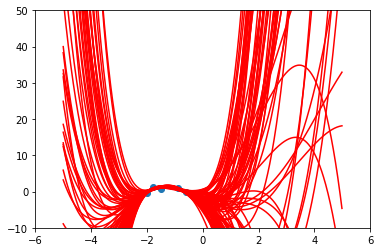

In [11]:
update(data[:5])
draw_estimates(10, data[:5])

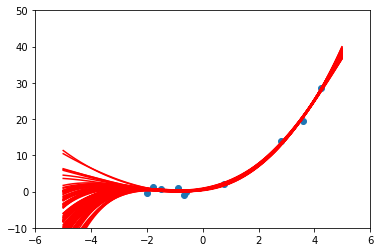

In [12]:
update(data[:10])
draw_estimates(10, data[:10])

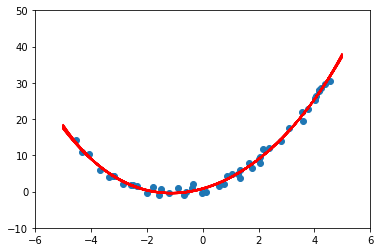

In [13]:
update(data[:50])
draw_estimates(10, data[:50])

In [14]:
mu

[array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[-2.49630444],
        [-4.39074581],
        [-0.27253432],
        [ 0.61879644],
        [-0.02436982]]),
 array([[ 0.54939813],
        [ 1.13716012],
        [ 0.9006526 ],
        [ 0.13632055],
        [-0.01207948]]),
 array([[ 0.81848023],
        [ 2.16976277],
        [ 0.93728551],
        [-0.00755095],
        [ 0.00539819]])]

In [15]:
a

[1, 3.5, 6.0, 26.0]

In [16]:
b

[0.01, 0.3899979829485134, 3.0021922902383356, 19.684993600068776]

In [17]:
1/np.sqrt(lmd)

array([0.19678062])

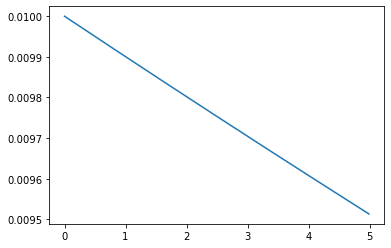

In [18]:
draw(lambda_dist, 0, 5, 0.01)

In [19]:
data = []
for i in range(1000):
    x = (np.random.rand() - 0.5)*10
    y = x**2 + 2*x + 1.0 + np.random.randn()
    
    data.append([x,y])
    
data

[[2.8593237166845045, 13.015415175603644],
 [0.22825363401083432, 2.3162969886465126],
 [-3.385792882271491, 5.4921015410249865],
 [1.2201933656249364, 4.335547198028929],
 [-2.9599013388122386, 3.409430685185703],
 [4.211403256068083, 27.550784097199294],
 [4.273001549763515, 27.860709823793293],
 [-4.342193457189638, 11.580631109610133],
 [-3.261582242274572, 5.317321652868123],
 [0.40075169813743927, 1.1607192054409197],
 [-0.1525276003929632, 0.16851205696333538],
 [2.7269742759730686, 12.224298312940629],
 [0.6879967463128323, 5.542958645840683],
 [0.692574032177038, 3.8870975364154505],
 [-4.068591895843655, 9.429222165794894],
 [-0.4587228072993921, 0.6363144008526034],
 [-2.8851244699903655, 4.923944060008821],
 [-3.8374451407480104, 8.896865593941955],
 [3.4766364876457443, 20.372090826262134],
 [-0.6409740337046943, 2.0688877876587015],
 [0.44080216422359486, 1.5949249925023015],
 [4.315182405559549, 27.77281354505357],
 [-4.346769261670717, 10.874864698932779],
 [1.191705374